# Qubit compilation of photonic circuits.

We show how to map qubit circuits to post-selected linear optical circuits via the ZX calculus.

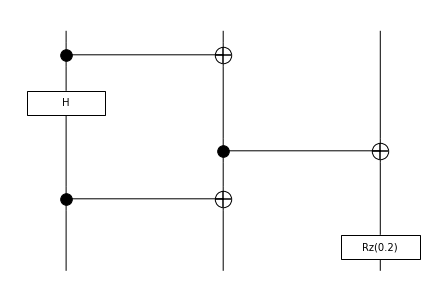

In [1]:
from discopy.quantum import CX, H, Id, Rz, Rx, CZ

circuit = CX @ Id(1) >> H @ CX >> CX @ Rz(0.2)
circuit.draw()

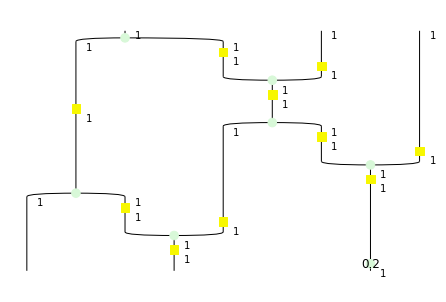

In [2]:
from discopy.quantum.zx import circuit2zx, decomp

diagram = decomp(circuit2zx(circuit))
diagram.draw()

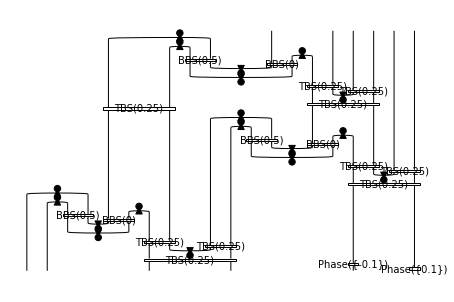

In [3]:
from discopy.quantum.optics import zx2path

circ = zx2path(diagram)
circ.draw(draw_type_labels=False)

In [4]:
def dual_rail_states(n_qubits):
    strings = []
    def genbin(n, bs=[]):
        if len(bs) == 2*n:
            strings.append(bs)
        else:
            genbin(n, bs + [1, 0])
            genbin(n, bs + [0, 1])
    genbin(n_qubits)
    return strings

dual_rail_states(2)

[[1, 0, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1]]

In [5]:
from discopy.quantum.optics import evaluate
import numpy as np

states = dual_rail_states(len(circuit.cod))
array = np.array([[evaluate(circ, x, y) for y in states] for x in states])
np.round(array, decimals=3)

array([[ 0.202-0.147j, -0.   -0.j   , -0.   +0.j   , ..., -0.   -0.j   ,
         0.202-0.147j, -0.   -0.j   ],
       [ 0.   -0.j   ,  0.202+0.147j, -0.   +0.j   , ..., -0.   +0.j   ,
         0.   -0.j   ,  0.202+0.147j],
       [-0.   +0.j   , -0.   +0.j   , -0.   +0.j   , ...,  0.202+0.147j,
        -0.   +0.j   ,  0.   +0.j   ],
       ...,
       [-0.   +0.j   , -0.   -0.j   ,  0.202-0.147j, ..., -0.   -0.j   ,
        -0.   +0.j   ,  0.   +0.j   ],
       [ 0.202-0.147j,  0.   +0.j   , -0.   -0.j   , ..., -0.   -0.j   ,
        -0.202+0.147j,  0.   -0.j   ],
       [-0.   +0.j   ,  0.202+0.147j,  0.   -0.j   , ..., -0.   +0.j   ,
         0.   +0.j   , -0.202-0.147j]])

In [6]:
circuit.eval()

Tensor(dom=Dim(2, 2, 2), cod=Dim(2, 2, 2), array=[0.5720614-0.41562694j, 0.    +0.j    , 0.    +0.j    ,
 ..., 0.    +0.j    , 0.    +0.j    ,
 -0.5720614-0.41562694j])

Check that the compiled photonic circuit has the same semantics as the qubit circuit we started with, up to a scalar.

In [7]:
assert np.allclose(2 * np.sqrt(2) * array.flatten(), circuit.eval().array.flatten())

In [8]:
from discopy.quantum.optics import qpath_drag, make_square, Id, annil, create

bot, top, mid = qpath_drag(make_square(circ))
assert np.allclose((mid >> mid.dagger()).array, Id(len(mid.dom)).array)
print('Number of modes: {}'.format(len(mid.dom)))
print('Number of input photons: {}'.format(bot.boxes.count(create)))
print('Number of post-selected photons: {}'.format(top.boxes.count(annil)))

Number of modes: 24
Number of input photons: 9
Number of post-selected photons: 9
